In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [2]:
#set random value
np.random.seed(35)

In [3]:
#parameters for brownian motion paths to simulate stock prices - which can be changed per user requirements
n_assets = 10 # number of assets in portfolio 
n_days = 20 # period
mu=0.01 # mean
sigma = 0.02  #volatility
initial_price = 100 

In [4]:
# Generate random daily returns for 5 assets (GBM)
returns = np.random.normal(mu, sigma, (n_days, n_assets))

# Convert returns to asset prices
prices = initial_price * np.exp(np.cumsum(returns, axis=0)) #brownian motion paths

# Compute daily returns from prices
daily_returns = np.diff(prices, axis=0) / prices[:-1]

# Convert to a DataFrame
returns_df = pd.DataFrame(daily_returns, columns=[f'Asset_{i+1}' for i in range(n_assets)])

In [5]:
window = 5
correlation_matrices_list=[]

for i in range(0,len(returns_df)+1-window):
    window_data = returns_df.iloc[i:i+window]
    correlation_matrices_list.append(window_data.corr())

In [6]:
#toy correlation matrix
test_correlation_matrix = correlation_matrices_list[0]

In [7]:
#function to create adjacency matrix which constructs the networks
def to_adj_matrix(test_correlation_matrix): 
    limit=0.4
    adj_matrix = test_correlation_matrix.copy()
    for i in range(test_correlation_matrix.shape[0]):
        for j in range(test_correlation_matrix.shape[1]):
            if abs(test_correlation_matrix.iloc[i,j])<limit:
                adj_matrix.iloc[i,j]=1
            else:
                adj_matrix.iloc[i,j]=0
    adj_matrix = adj_matrix.to_numpy()
    return adj_matrix
    #print(adj_matrix)

In [8]:
#function to create list of adjacency matrices from list of correlation matrices

def to_adj_matrices_list(correlation_matrices_list):
    adj_matrices_list=[]
    for matrix in correlation_matrices_list:
        adj_matrices_list.append(to_adj_matrix(matrix))
    return adj_matrices_list
#print(adj_matrices_list)

In [10]:
adj_matrix_list=to_adj_matrices_list(correlation_matrices_list)

In [11]:
#function to create single graph from single adjacency matrix

def to_graph(test_adj_matrix): #function to draw graphs
    G = nx.from_numpy_array(test_adj_matrix)
    plt.figure(figsize=(5, 5))  # Optional: Adjust the size of the plot
    nx.draw(G, with_labels=True, node_size=500, node_color='skyblue', font_size=10)
    plt.show()
    return G

In [12]:
def to_graphs_list(adj_matrix_list):
    graphs_list=[]
    for matrix in adj_matrix_list:
        graphs_list.append(to_graph(matrix))
    return graphs_list
    print(graphs_list)

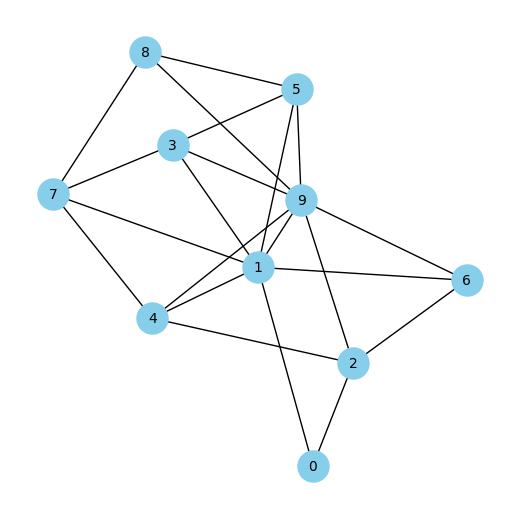

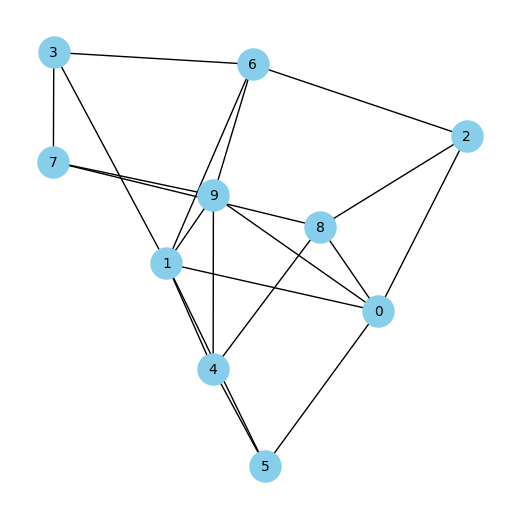

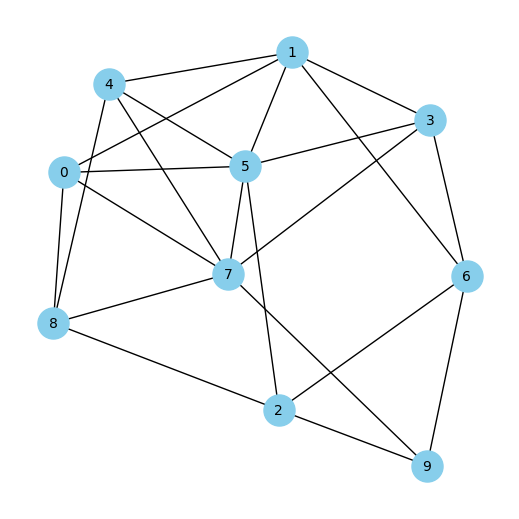

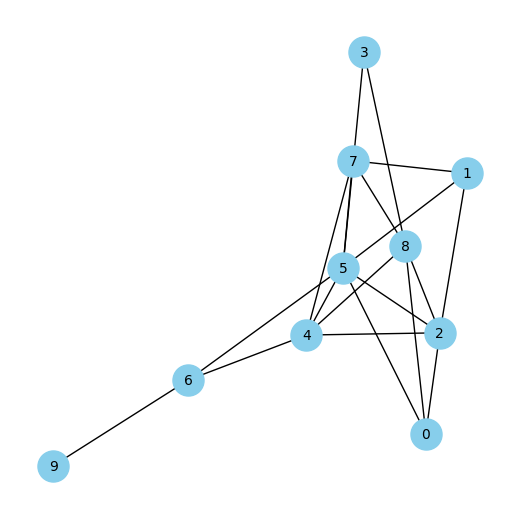

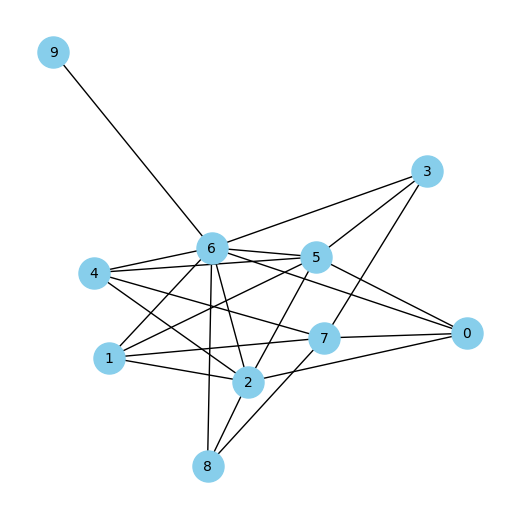

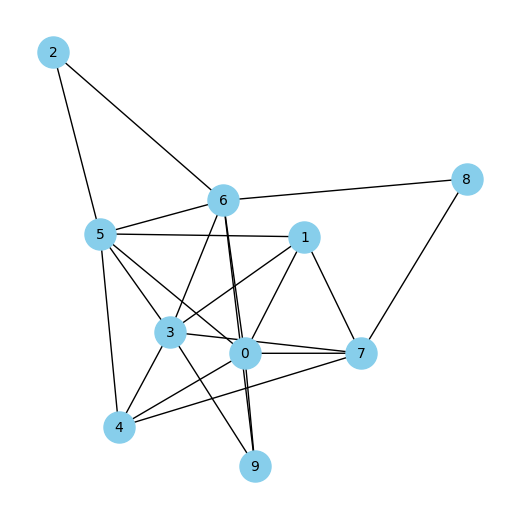

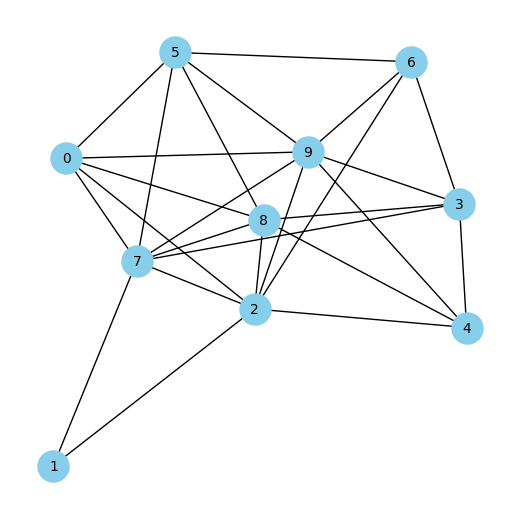

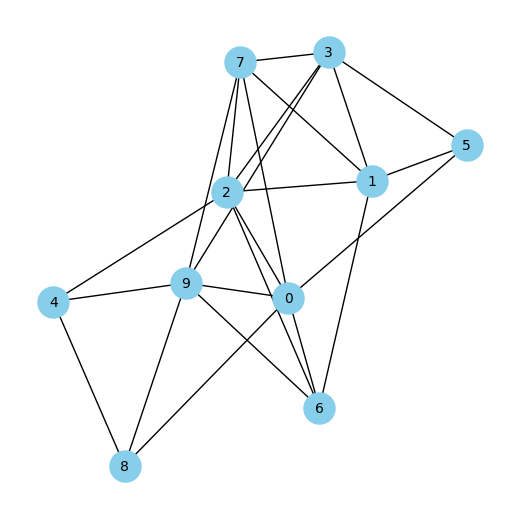

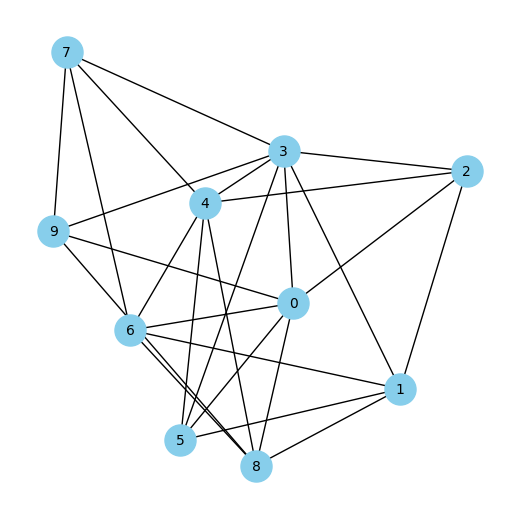

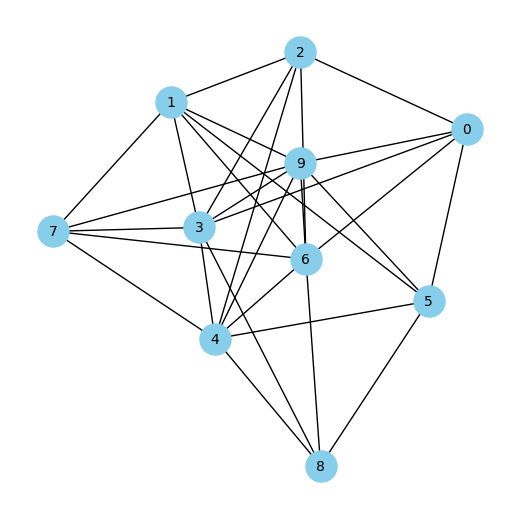

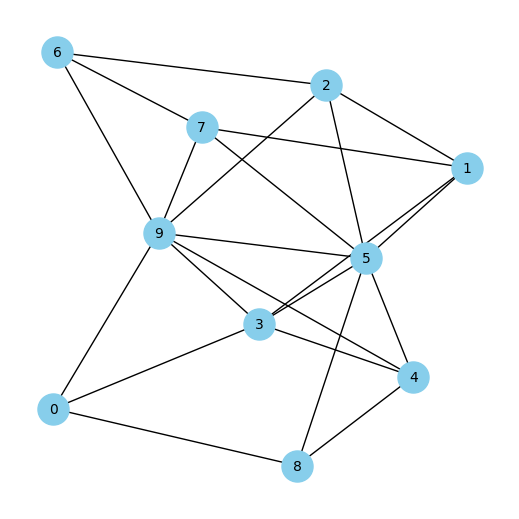

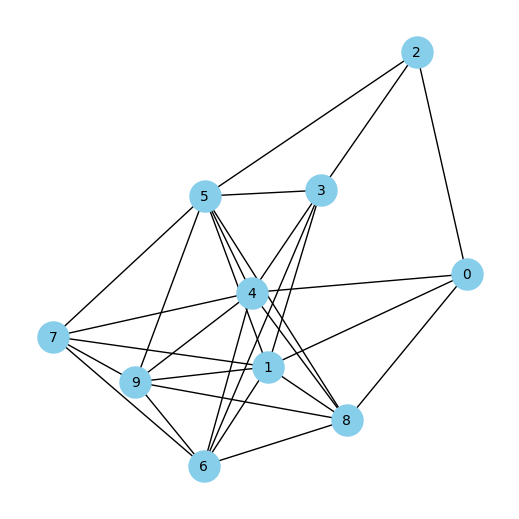

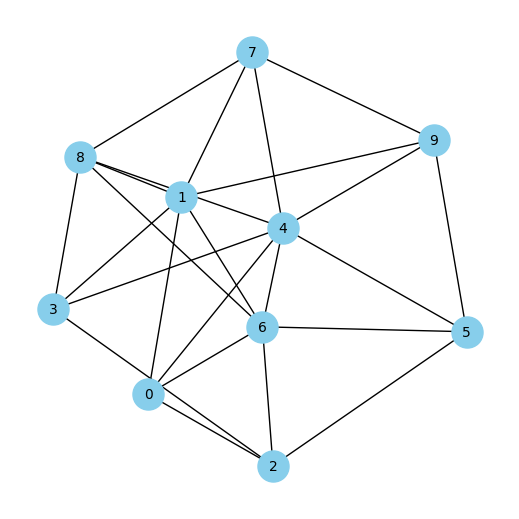

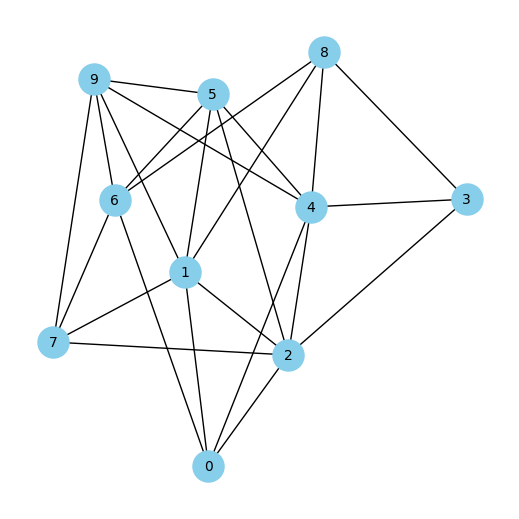

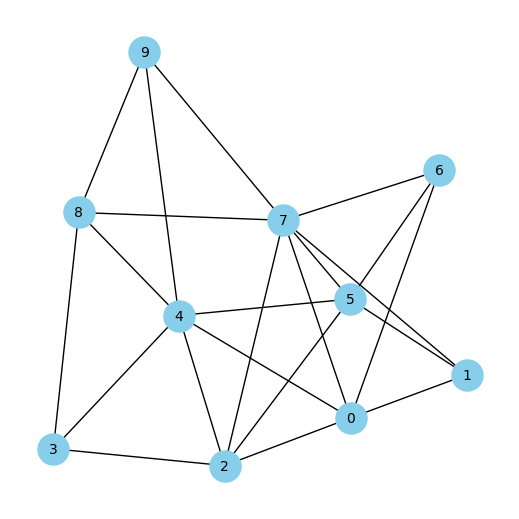

In [13]:
graphs=to_graphs_list(adj_matrix_list)

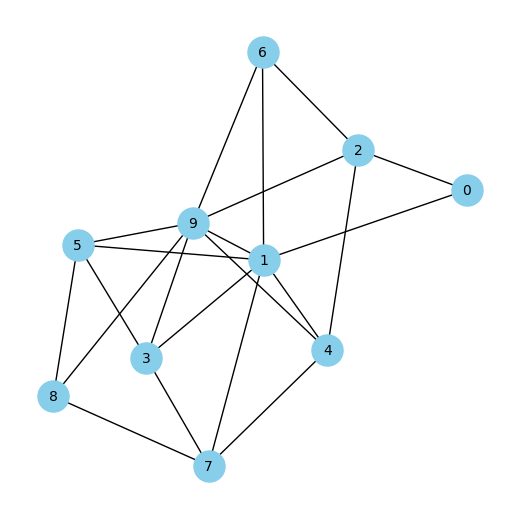

In [14]:
#creating test graph to play/test with
test_adj_matrix = to_adj_matrix(test_correlation_matrix)
test_graph=to_graph(test_adj_matrix)

In [15]:
#metric 1 - path length
print(nx.average_shortest_path_length(test_graph))

def to_path_length_list(graph_list):
        path_length_list=[]
        for graph in graph_list:
            path_length_list.append(nx.average_shortest_path_length(graph))
        return path_length_list
    
path_lengths = to_path_length_list(graphs)

# Create the plot with Seaborn
plt.figure(figsize=(10, 6))

values=[x for x in range(n_days-window)] #adjust later to be representative of windows

sns.lineplot(x=values, y=path_lengths, color='purple')

# Add labels and title
plt.xlabel('Windows')
plt.ylabel('Average Path Legnth') 
plt.title(f'Average Path Length of Empirical Graph over a Sliding Window of {window} days in a {n_days} period') #fix
#plt.legend()

ER_average_path_length = np.log(n_assets)
BA_average_path_length = np.log(n_assets)/np.log(np.log(n_assets))

import numpy as np
plt.axhline(y=ER_average_path_length , color='red', linestyle='--', linewidth=2) 
plt.axhline(y=BA_average_path_length , color='blue', linestyle='--', linewidth=2) 

# Show the plot
plt.show()

1.5555555555555556


In [33]:
def to_average_clustering_coeff_list(graph_list):
        average_clustering_coeff_list=[]
        for graph in graph_list:
            average_clustering_coeff_list.append(nx.average_clustering(graph))
        return average_clustering_coeff_list
    
average_clustering_coeff_lengths = to_average_clustering_coeff_list(graphs)

In [40]:
#function to create ER Average Clustering Coefficient:

def ER_average_clustering_coefficient(graph):
    m=graph.number_of_edges()
    n=graph.number_of_nodes()
    p=2*m/(n*(n-1))
    formula = p * (1 - (1 - p) ** (n - 1) - p * (n - 1) * (1 - p) ** (n - 2))
    print(formula)
    
def ER_average_clustering_coefficient_list(list):
    ER_average_clustering_coefficient_list=[]
    for graph in list:
        ER_average_clustering_coefficient_list.append(ER_average_clustering_coefficient(graph))
    return ER_average_clustering_coefficient_list

ER_average_clustering_coefficient_list = ER_average_clustering_coefficient_list(graphs)



0.4522068197861979
0.4260714988784304
0.4777070686830031
0.39926700149382255
0.4777070686830031
0.4777070686830031
0.5744968434385253
0.5026228324767577
0.5509506479520355
0.6434312040613119
0.4777070686830031
0.6206791844952186
0.527015199692513
0.527015199692513
0.4777070686830031


In [ ]:
#metric 2 - average clustering coeff

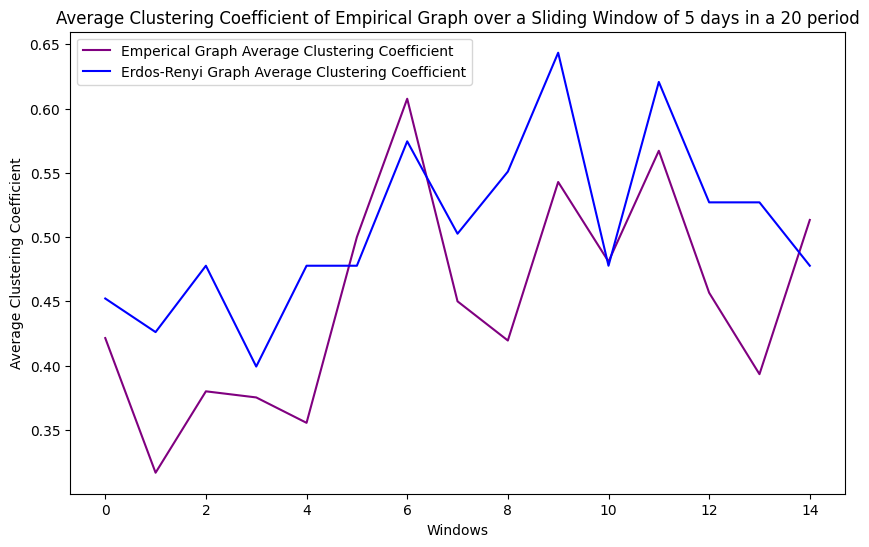

In [52]:

def to_average_clustering_coeff_list(graph_list):
        average_clustering_coeff_list=[]
        for graph in graph_list:
            average_clustering_coeff_list.append(nx.average_clustering(graph))
        return average_clustering_coeff_list
    
average_clustering_coeff_lengths = to_average_clustering_coeff_list(graphs)

#function to create ER Average Clustering Coefficient:

def ER_average_clustering_coefficient(graph):
    m=graph.number_of_edges()
    n=graph.number_of_nodes()
    p=2*m/(n*(n-1))
    formula = p * (1 - (1 - p) ** (n - 1) - p * (n - 1) * (1 - p) ** (n - 2))
    return formula
    
def ER_average_clustering_coefficient_list(list):
    ER_average_clustering_coefficient_list=[]
    for graph in list:
        ER_average_clustering_coefficient_list.append(ER_average_clustering_coefficient(graph))
    return ER_average_clustering_coefficient_list

ER_average_clustering_coefficient_list = ER_average_clustering_coefficient_list(graphs)


# Create the plot with Seaborn
plt.figure(figsize=(10, 6))

values=[x for x in range(n_days-window)] #adjust later to be representative of windows

sns.lineplot(x= values, y=average_clustering_coeff_lengths, color='purple', label = 'Emperical Graph Average Clustering Coefficient')

sns.lineplot(x= values, y=ER_average_clustering_coefficient_list, color='blue', label='Erdos-Renyi Graph Average Clustering Coefficient')

# Add labels and title
plt.xlabel('Windows')
plt.ylabel('Average Clustering Coefficient') 
plt.title(f'Average Clustering Coefficient of Empirical Graph over a Sliding Window of {window} days in a {n_days} period') #fix
plt.legend()


# Show the plot
plt.show()


In [53]:
#metric 3 - degree distribution - actually recheck formula

In [ ]:
def to_degree_dist_list(graph_list):
        degree_dist_list=[]
        for graph in graph_list:
            degree_dist_list.append(nx.average_clustering(graph))
        return average_clustering_coeff_list
    
average_clustering_coeff_lengths = to_average_clustering_coeff_list(graphs)

#function to create ER Average Clustering Coefficient:

def ER_average_clustering_coefficient(graph):
    m=graph.number_of_edges()
    n=graph.number_of_nodes()
    p=2*m/(n*(n-1))
    formula = p * (1 - (1 - p) ** (n - 1) - p * (n - 1) * (1 - p) ** (n - 2))
    return formula
    
def ER_average_clustering_coefficient_list(list):
    ER_average_clustering_coefficient_list=[]
    for graph in list:
        ER_average_clustering_coefficient_list.append(ER_average_clustering_coefficient(graph))
    return ER_average_clustering_coefficient_list

ER_average_clustering_coefficient_list = ER_average_clustering_coefficient_list(graphs)


# Create the plot with Seaborn
plt.figure(figsize=(10, 6))

values=[x for x in range(n_days-window)] #adjust later to be representative of windows

sns.lineplot(x= values, y=average_clustering_coeff_lengths, color='purple', label = 'Emperical Graph Average Clustering Coefficient')

sns.lineplot(x= values, y=ER_average_clustering_coefficient_list, color='blue', label='Erdos-Renyi Graph Average Clustering Coefficient')

# Add labels and title
plt.xlabel('Windows')
plt.ylabel('Average Clustering Coefficient') 
plt.title(f'Average Clustering Coefficient of Empirical Graph over a Sliding Window of {window} days in a {n_days} period') #fix
plt.legend()


# Show the plot
plt.show()